In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
data_train = pd.read_csv('SalaryData_Train.csv') #loading the dataset
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data_test = pd.read_csv('SalaryData_Test(1).csv') #loading the dataset

In [ ]:
data_train.isnull().sum() #checking for null 

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
print('workclass',data_train['workclass'].unique()) #unique data of columns
print('education',data_train['education'].unique())
print('maritalstatus',data_train['maritalstatus'].unique())
print('occupation',data_train['occupation'].unique())
print('relationship',data_train['relationship'].unique())
print('race',data_train['race'].unique())
print('sex',data_train['sex'].unique())
print('native',data_train['native'].unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras

In [ ]:
data_train.education.replace(to_replace=' 11th',value='school',inplace= True) # changing the values of some columns for better model building
data_train.education.replace(to_replace=' 9th',value='school',inplace=True)
data_train.education.replace(to_replace=' 7th-8th',value='school',inplace=True)
data_train.education.replace(to_replace=' 5th-6th',value='school',inplace=True)
data_train.education.replace(to_replace=' 10th',value='school',inplace=True)
data_train.education.replace(to_replace=' Preschool',value='school',inplace=True)
data_train.education.replace(to_replace=' 12th',value='school',inplace=True)
data_train.education.replace(to_replace=' 1st-4th',value='school',inplace=True)
data_train.education.replace(to_replace=' Some-college',value='college',inplace=True)
data_train.education.replace(to_replace=' Assoc-acdm',value='college',inplace=True)
data_train.education.replace(to_replace=' Assoc-voc',value='college',inplace=True)

In [ ]:
data_train.maritalstatus.replace(' Never-married','Single',inplace=True)  # changing the values of some columns for better model building
data_train.maritalstatus.replace(' Married-spouse-absent','Single',inplace=True)
data_train.maritalstatus.replace(' Seperated','Single',inplace=True)
data_train.maritalstatus.replace(' Divorced','Single',inplace=True)
data_train.maritalstatus.replace(' Married-civ-spouse','Married',inplace=True)
data_train.maritalstatus.replace(' Married-AF-spouse','Married',inplace=True)
data_train.maritalstatus.replace(' Widowed','Widowed',inplace=True)

In [ ]:
data_test.education.replace(to_replace=' 11th',value='school',inplace= True)  # changing the values of some columns for better model building
data_test.education.replace(to_replace=' 9th',value='school',inplace=True)
data_test.education.replace(to_replace=' 7th-8th',value='school',inplace=True)
data_test.education.replace(to_replace=' 5th-6th',value='school',inplace=True)
data_test.education.replace(to_replace=' 10th',value='school',inplace=True)
data_test.education.replace(to_replace=' Preschool',value='school',inplace=True)
data_test.education.replace(to_replace=' 12th',value='school',inplace=True)
data_test.education.replace(to_replace=' 1st-4th',value='school',inplace=True)
data_test.education.replace(to_replace=' Some-college',value='college',inplace=True)
data_test.education.replace(to_replace=' Assoc-acdm',value='college',inplace=True)
data_test.education.replace(to_replace=' Assoc-voc',value='college',inplace=True)

In [ ]:
data_test.maritalstatus.replace(' Never-married','Single',inplace=True)  # changing the values of some columns for better model building
data_test.maritalstatus.replace(' Married-spouse-absent','Single',inplace=True)
data_test.maritalstatus.replace(' Seperated','Single',inplace=True)
data_test.maritalstatus.replace(' Divorced','Single',inplace=True)
data_test.maritalstatus.replace(' Married-civ-spouse','Married',inplace=True)
data_test.maritalstatus.replace(' Married-AF-spouse','Married',inplace=True)
data_test.maritalstatus.replace(' Widowed','Widowed',inplace=True)

In [ ]:
data_train[['education', 'educationno']].groupby(['education'], as_index=False).mean().sort_values(by='educationno', ascending=False)

,education,educationno
1,Doctorate,16.000000
4,Prof-school,15.000000
3,Masters,14.000000
0,Bachelors,13.000000
5,college,10.369551
2,HS-grad,9.000000
6,school,5.609730


In [ ]:
data_train.groupby('maritalstatus').mean() #understanding the marital column

,age,educationno,capitalgain,capitalloss,hoursperweek
maritalstatus,,,,,
Separated,39.397231,9.384452,573.953142,61.301384,39.709265
Married,42.752236,10.341261,1757.957121,123.380520,43.797813
Single,33.012090,10.007618,499.694598,56.160598,38.565798
Widowed,57.750907,9.178960,587.043531,77.610641,34.422007


In [ ]:
le_workclass = LabelEncoder() #converting into categorical data
le_education = LabelEncoder()
le_marital = LabelEncoder()
le_occupation = LabelEncoder()
le_relation = LabelEncoder()
le_race = LabelEncoder()
le_sex = LabelEncoder()
le_native = LabelEncoder()
le_salary = LabelEncoder()

In [ ]:
data_train['workclass'] = le_workclass.fit_transform(data_train['workclass'])
data_train['education'] = le_education.fit_transform(data_train['education'])
data_train['maritalstatus'] = le_marital.fit_transform(data_train['maritalstatus'])
data_train['occupation'] = le_occupation.fit_transform(data_train['occupation'])
data_train['relationship'] = le_relation.fit_transform(data_train['relationship'])
data_train['race'] = le_race.fit_transform(data_train['race'])
data_train['sex'] = le_sex.fit_transform(data_train['sex'])
data_train['native'] = le_native.fit_transform(data_train['native'])
data_train['Salary'] = le_salary.fit_transform(data_train['Salary'])

In [ ]:
data_test['workclass'] = le_workclass.fit_transform(data_test['workclass'])
data_test['education'] = le_education.fit_transform(data_test['education'])
data_test['maritalstatus'] = le_marital.fit_transform(data_test['maritalstatus'])
data_test['occupation'] = le_occupation.fit_transform(data_test['occupation'])
data_test['relationship'] = le_relation.fit_transform(data_test['relationship'])
data_test['race'] = le_race.fit_transform(data_test['race'])
data_test['sex'] = le_sex.fit_transform(data_test['sex'])
data_test['native'] = le_native.fit_transform(data_test['native'])
data_test['Salary'] = le_salary.fit_transform(data_test['Salary'])

In [ ]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,0,13,2,0,1,4,1,2174,0,40,37,0
1,50,4,0,13,1,3,0,4,1,0,0,13,37,0
2,38,2,2,9,2,5,1,4,1,0,0,40,37,0
3,53,2,6,7,1,5,0,2,1,0,0,40,37,0
4,28,2,0,13,1,9,5,2,0,0,0,40,4,0


In [ ]:
from numpy import set_printoptions # feature selection to drop unnecessary features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X_train = data_train.iloc[:,0:13]
Y_train = data_train.iloc[:,13]

In [ ]:
feature = SelectKBest(score_func=chi2,k=5)
fit =feature.fit(X_train,Y_train)
set_printoptions(precision=3)
print(fit.scores_)

[7.927e+03 4.061e+00 1.200e+03 2.178e+03 8.584e+02 2.186e+02 3.435e+03
 2.934e+01 4.592e+02 7.412e+07 1.259e+06 5.569e+03 1.671e+01]


In [ ]:
X_train = X_train.drop(['capitalgain','capitalloss'],axis=1) # droping the features wit less score

In [ ]:
X_train.shape

(30161, 11)

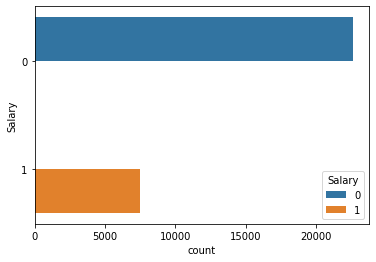

In [ ]:
sns.countplot(y=data_train['Salary'],hue=data_train['Salary']) #visualisation for better understanding

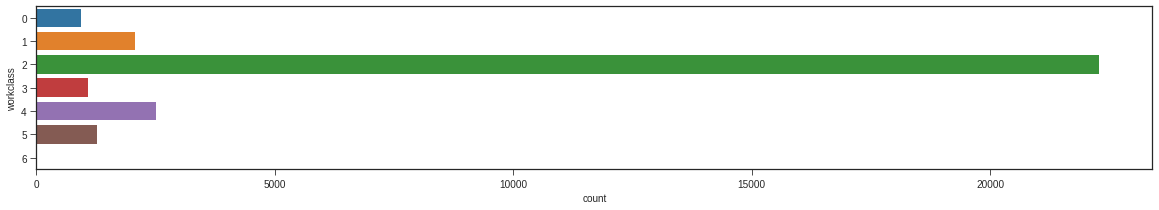

In [ ]:
plt.style.use('seaborn-ticks')  #visualisation for better understanding
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=data_train)

In [ ]:
X_test = data_test.iloc[:,0:13] #seperating into features and label
Y_test = data_test.iloc[:,13]

In [ ]:
X_test = X_test.drop(['capitalgain','capitalloss'],axis=1)

In [ ]:
X_test.shape

(15060, 11)

Can't perform the hyperparameters tuning because of the computational limitation.

In [ ]:
model = SVC(C=1,kernel='rbf') #model building
model.fit(X_train,Y_train)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred = model.predict(X_test) #predicting the values

In [ ]:
acc= accuracy_score(Y_test,pred) #checking for the accuracy
print(acc)

0.8083001328021249


# Question 2

In [ ]:
forest = pd.read_csv('forestfires.csv') #loading the dataset
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [ ]:
forest = forest.iloc[:,0:11]

In [ ]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   517 non-null    object 
 1   day     517 non-null    object 
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 44.6+ KB


{'boxes': [<matplotlib.lines.Line2D at 0x7f6295ac9ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6295ad0f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6295adbf90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6295adba50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6295ad04d0>,
  <matplotlib.lines.Line2D at 0x7f6295ad0a10>]}

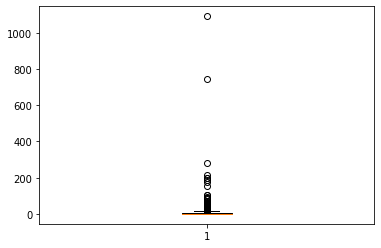

In [ ]:
plt.boxplot(forest.area) #finding the outliers

In [ ]:
forest.shape

(517, 11)

In [ ]:
le = LabelEncoder() #converting into categorical data

In [ ]:
forest['month'] = le.fit_transform(forest['month'])
forest['day'] = le.fit_transform(forest['day'])

In [ ]:
std = MinMaxScaler() #transforming into standard data between the range of (0,1)
std_fire = std.fit_transform(forest)

In [ ]:
col = forest.columns

In [ ]:
std_fire = pd.DataFrame(std_fire,columns=col) #forming of dataframe from array value

In [ ]:
std_fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


In [ ]:
X = std_fire.iloc[:,0:10] #seperating into features and labels
Y = std_fire.iloc[:,10]

In [ ]:
X.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000
1,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000
2,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000
3,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125
4,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000


In [ ]:
Y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    0.005904
513    0.049769
514    0.010231
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42) #train test split of data

In [ ]:
model = SVR() #finding the optimum hyperparameter using gridsearchcv
param_grid = dict({'C':[0.1,1,5,3,10],'gamma':[1,0.1,5,50,2]})
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 5, 3, 10], 'gamma': [1, 0.1, 5, 50, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print('best parameters are',grid.best_params_)

best parameters are {'C': 3, 'gamma': 2}


In [ ]:
svr = SVR(C=3,kernel='rbf',gamma=2) #model building
svr.fit(x_train,y_train)

SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=2,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
pred = svr.predict(x_test) #predicting

In [ ]:
from sklearn.metrics import mean_squared_error as mse # to check the error
error = mse(y_test,pred)
print(error)

0.011570128526511127
